In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Logistic Regression with SciKit-Learn

In [2]:
import numpy  as np
import pandas as pd

The data we want to investigate is stored in the file `'exam-iq.csv'`.  The first column of this file is an integer from the set $\{0,1\}$.  The number is $0$ if the corresponding student has failed the exam and is $1$ otherwise.  The second column is a floating point number that lists the number of hours that the student has studied.  The third column is an integer value specifying the [IQ](https://en.wikipedia.org/wiki/Intelligence_quotient) of the student.

In [3]:
!cat exam-iq.csv || type exam-iq.csv

Pass,Hours,IQ
0,0.50,110
0,0.75,95
0,1.00,118
0,1.25,97
0,1.50,100
0,1.75,110
0,1.75,115
1,2.00,104
1,2.25,120
0,2.50,98
1,2.75,118
0,3.00,88
1,3.25,108
1,4.00,109
1,4.25,110
1,4.50,112
1,4.75,97
1,5.00,102
1,5.50,109
0,3.50,125


The data is read with the library `pandas`.

In [4]:
ExamDF = pd.read_csv('exam-iq.csv')
ExamDF

,Pass,Hours,IQ
0,0,0.50,110
1,0,0.75,95
2,0,1.00,118
3,0,1.25,97
4,0,1.50,100
5,0,1.75,110
6,0,1.75,115
7,1,2.00,104
8,1,2.25,120
9,0,2.50,98


We extract the data from the data frame and convert it into `NumPy` arrays.  Furthermore, the pass/fail results are converted into floats.

In [5]:
X = np.array(ExamDF[['Hours','IQ']])
Y = np.array(ExamDF['Pass'], dtype=float)

To proceed, we will plot the data points using a scatter plot.  

In [6]:
import matplotlib.pyplot as plt
import seaborn           as sns

In order to plot the <bf style="color:red;">losers</bf> in a different color, we split the data frame `ExamDF` into winners and losers. 

In [7]:
Y == 1.0

array([False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False])

We can select both winners and losers by indexing with Boolean arrays.

In [8]:
X_pass = X[Y == 1.0]
X_fail = X[Y == 0.0]

Now we are ready to plot the data.

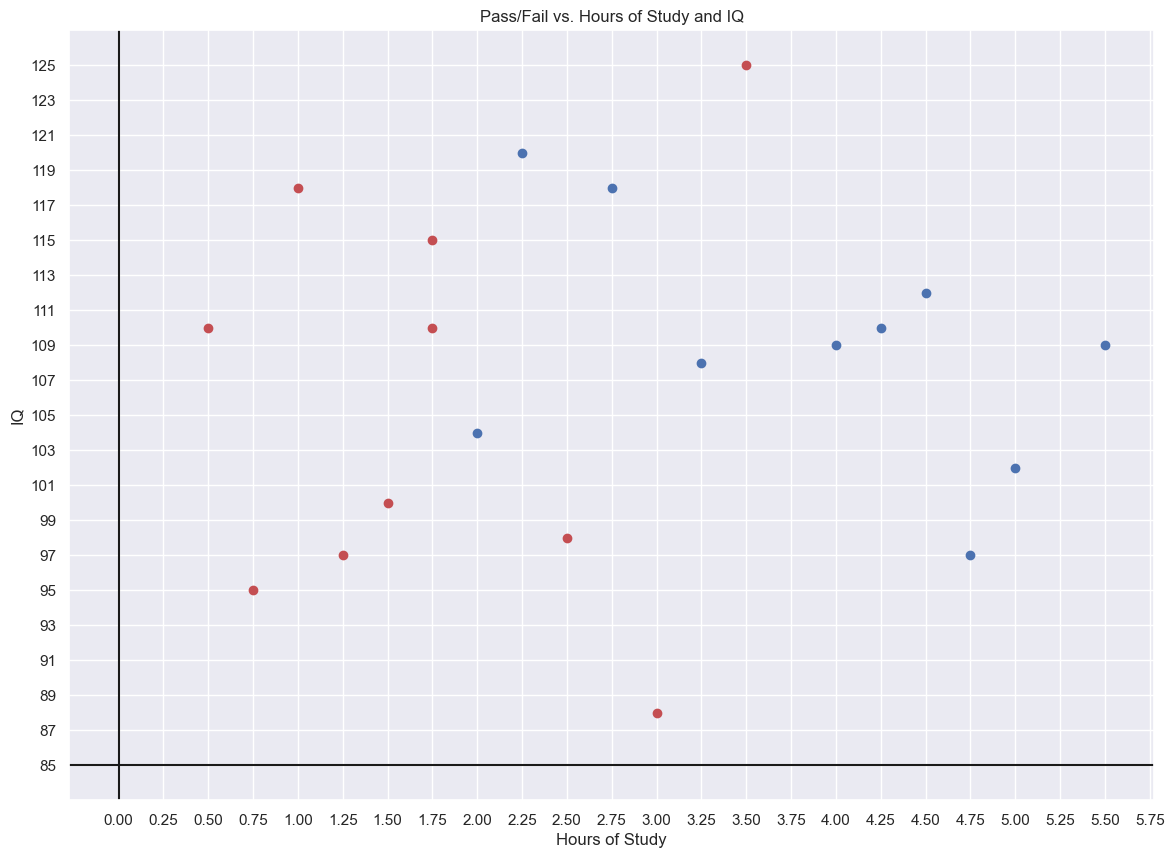

In [9]:
plt.figure(figsize=(14, 10))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='b') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='r') # plot the losers red

There is one student who failed although he has an IQ of 125 and he did study for $3.5$ hours.  Maybe he was still drunk when he had to write the exam.  The student with an IQ of 104 who did pass while only studying for $2$ hours might just have gotten lucky.

We import the module `linear_model` from SciKit-Learn.

In [10]:
import sklearn.linear_model as lm

We built a *logistic regression* model.   The first parameter `C` is the so called *regularization* parameter.  If we set it to a high value, then we do not regularize.  The second parameter `tol` is the *tolerance*.  It specifies when gradient descent should stop.  

In [11]:
M = lm.LogisticRegression(C=100_000, tol=1e-8)

Next, we train the model with the data we have.  The parameter `C` is a *regularization* parameter.  Setting it to a high values avoids any regularization.

In [12]:
%%time
M.fit(X, Y)

CPU times: user 16.4 ms, sys: 4.18 ms, total: 20.5 ms
Wall time: 17.4 ms


LogisticRegression(C=100000, tol=1e-08)

We extract the parameters that we have learned.

In [13]:
ϑ0     = M.intercept_[0]
ϑ1, ϑ2 = M.coef_[0]

According to the model we have learned, the probability $P(h,q)$ that a student, who has learned for $h$ hours and has an IQ of $q$, will pass the exam, is given as
$$ P(h, q) = S(\vartheta_0 + \vartheta_1 \cdot h + \vartheta_2 \cdot q) $$
In general, we expect her to pass the exam if
$$ \vartheta_0 + \vartheta_1 \cdot h + \vartheta_2 \cdot q \geq 0. $$
This can be rewritten as follows:
$$  q \geq -\frac{\vartheta_0 + \vartheta_1 \cdot h}{\vartheta_2}. $$
Let us plot this borderline $h \mapsto -\frac{\vartheta_0 + \vartheta_1 \cdot h}{\vartheta_2}$ together with the data.
This line is also known as the *decision boundary*: Every student whose features are below the decision boundary is predicted to fail the exam, if the features are above the decision boundary, the student is expected to pass.

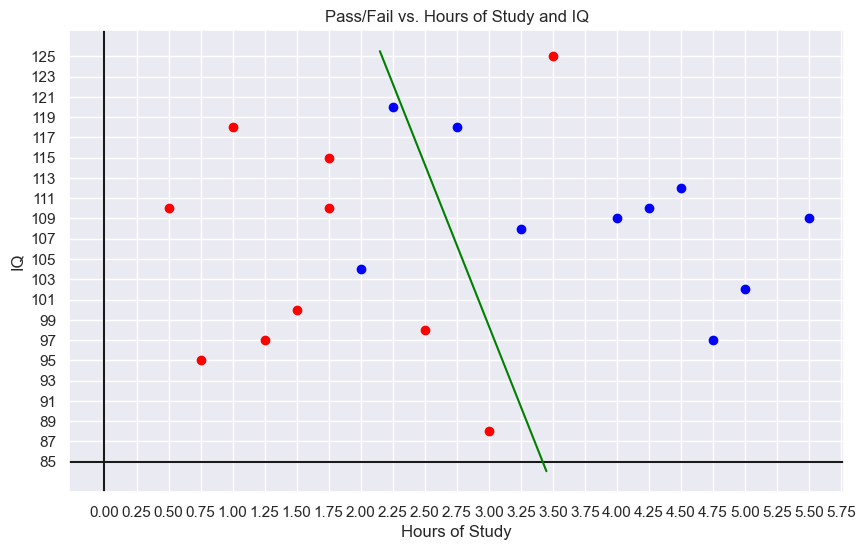

In [14]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='blue') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='red')  # plot the losers red
H = np.arange(2.15, 3.5, 0.05)
P = -(ϑ0 + ϑ1 * H)/ϑ2
plt.plot(H, P, color='green')

It seems that three students are misclassified, but one of them is only misclassified by a small margin 
as the data points are very close to the green borderline.

In [15]:
errors   = np.sum(np.abs(Y - M.predict(X)))
accuracy = (len(Y) - errors) / len(Y)
accuracy

0.85

We are able to predict $85\%$ of the results correctly.  Instead of computing the accuracy manually we could have used the method `score`.

In [16]:
M.score(X, Y)

0.85

The fact that we did not predict the correct result for the student who learned for $2.25$ hours and who has an IQ of $120$ is due to the *outlier* that we have in our data set.  Fortunately, the outlier happens to be the last student in the dataset.  We will remove this student when training our model.

In [17]:
M.fit(X[:-1], Y[:-1])

LogisticRegression(C=100000, tol=1e-08)

Now only one student is misclassified and hence the accuracy goes up to nearly $95\%$.

In [18]:
M.score(X[:-1], Y[:-1])

0.9473684210526315

In order to plot the decision boundary, we have to extract the coefficients of the new model.

In [19]:
ϑ0     = M.intercept_[0]
ϑ1, ϑ2 = M.coef_[0]

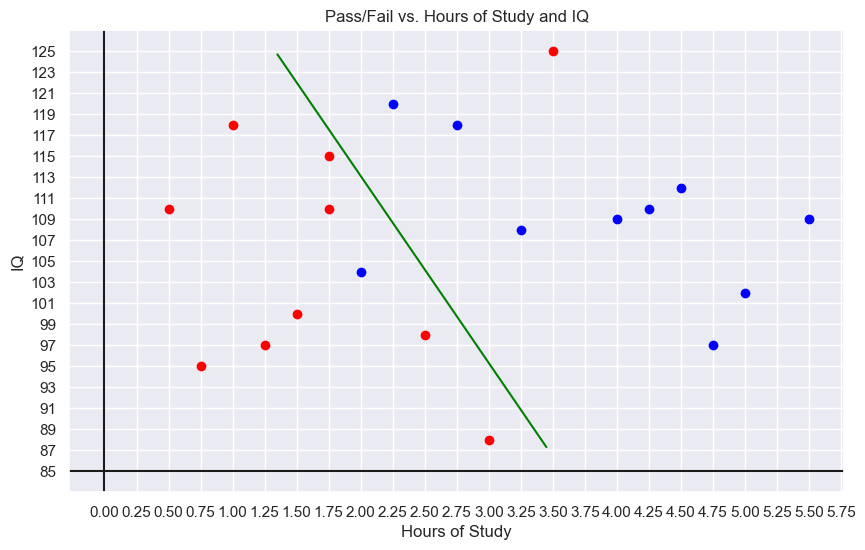

In [20]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
plt.title('Pass/Fail vs. Hours of Study and IQ')
plt.axvline(x=0.0, c='k')
plt.axhline(y=85.0, c='k')
plt.xlabel('Hours of Study')
plt.ylabel('IQ')
plt.xticks(np.arange(0.0, 6.0, step=0.25))
plt.yticks(np.arange(85, 126, step=2.0))
plt.scatter(X_pass[:,0], X_pass[:,1], color='blue') # plot student who passed in blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='red')  # plot the losers red
H = np.arange(1.35, 3.5, 0.05)
P = -(ϑ0 + ϑ1 * H)/ϑ2
plt.plot(H, P, color='green')

This time, logistic regression is able to predict all but two of the results correctly.